# Objective :
## To predict the value of mpg based on the one features like cylinders, displacement  , weight or acceleration, using Univariate Linear Regression

### importing necessary libraries

In [15]:
import pandas as pd   # for reading the csv file
import numpy as np     # for dea;ing with n-dimensional matrices
import matplotlib.pyplot as plt       # for plotting the results
from IPython.display import clear_output  


In [16]:
dataset = pd.read_csv("auto-mpg.csv")
dataset.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Data Cleaning 
## 1. making sure that our data is icluding only those features which are having integer or float as datatype 
### we do so by using pandas' select_dtypes() method.

In [17]:
dataset=dataset.select_dtypes(include=('float64','int64'))  #this will remove the 'ocean_proximity' feature
dataset.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


## 2. making sure that our data is not having any NaN value
### check which feature is having NaN values with pandas.isna() method

In [18]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

## 3. Data Normalisation
## Here we are doing standard normalisation by subtraction data by mean and dividing it with standard deviation so that our data can be standardised with mean=0 and std=1

In [19]:
def scalar(x):
    return (x-np.mean(x))/np.std(x)


In [20]:
print("Before Normalisation: \n")
print("dataset.mean(): ",np.array(dataset.mean()))
print("dataset.std(): ",np.array(dataset.std()))

dataset =scalar(dataset)

print("\n After Normalisation: \n")
print("dataset.mean(): ",np.array(dataset.mean()))
print("dataset.std(): ",np.array(dataset.std()))

Before Normalisation: 

dataset.mean():  [2.35145729e+01 5.45477387e+00 1.93425879e+02 2.97042462e+03
 1.55680905e+01 7.60100503e+01 1.57286432e+00]
dataset.std():  [7.81598431e+00 1.70100424e+00 1.04269838e+02 8.46841774e+02
 2.75768893e+00 3.69762665e+00 8.02054878e-01]

 After Normalisation: 

dataset.mean():  [-7.28339778e-16 -7.67113899e-16 -1.20506620e-16 -1.39475254e-17
  5.90315067e-15 -8.83715212e-16 -4.53573527e-16]
dataset.std():  [1.00125865 1.00125865 1.00125865 1.00125865 1.00125865 1.00125865
 1.00125865]


## selecting the target_variable we want to predict

In [21]:
target=dataset['mpg']

# for univariate regression,
###                y=x*m + c
###               where x is our independent feature variable and y is our dependent variable
###               we are trying to fit a line between our x and y
###                         m is the slope of the line and c is the intercept we have on y axis.
###              here the y, i.e., target variable is the 'median_house_value'

In [22]:
def line(m,x,c):
    return m*x + c

###  In Regression, we will be calculating the Mean Squared Error
###    error  = mean(  ( y_predicted - y_dataset ) ^2 )
#####  y_predicted will be calculated from our linear regression model.

In [23]:
def error(m,x,c,y):
    return np.mean((line(m,x,c)-y)**2)

## Improving the performance of our model

### We need to minimise the error in order to improve the performance of our model.
### In the Error Function(m,x,c,y) .... x and y are from the dataset, that's why there are constant and the only parameter  which decide the  value of error are....   m and c
### So basically error is a function of m and c and we know we need to minimise the error.  For this, we need to find the best possible values of m and c for which our error will be minimum.
### To find best values of m and c, We use Gradient Descent Algorithm.

In [24]:
# derivative of error function wrt to slope,m.
def derivative_wrt_m(m,x,c,y):
    return np.mean((line(m,x,c)-y)*x)

# derivative of error function wrt to intercept,c.
def derivative_wrt_c(m,x,c,y):
    return np.mean(line(m,x,c)-y)


def accuracy(m,x,c,y):
    currentError = error(m,feature,c,target)
    maxError = np.mean(target**2)
    return (1-(currentError / maxError))*100

## setting initial values for slope and intercept 

In [47]:
# selecting initial values from standard normal distribution
m0=np.random.random()
c0=np.random.random()

##  training the model by gradient descent algorithm by updating the values of m and c in the direction of gradients, i.e., derivative wrt m and c respectively

In [84]:
def model_train(alpha,num_of_iteration,feature):
    m=m0
    c=c0
    cost=[]
    for i in range(num_of_iteration):
        m=m-alpha*derivative_wrt_m(m,feature,c,target)
        c=c-alpha*derivative_wrt_c(m,feature,c,target)
        cost.append(error(m,feature,c,target))
        print(cost[i])
        clear_output(True)
    plt.scatter(feature,target,color='blue',label="Actual")
    plt.scatter(feature,line(m0,feature,c0),color='Red',label="Before training")
    plt.scatter(feature,line(m,feature,c),color='green',label="After training")
    plt.legend()
    plt.xlabel("feature used")
    plt.ylabel("MPG values")
    plt.show()
    plt.plot(cost)
    plt.xlabel("iteration number")
    plt.ylabel("Error")
    plt.show()
    print("The error is : ",error(m,feature,c,target))



## Feature Selection based on correlation of mpg with rest of the features

In [85]:
dataset.corr()['mpg'].drop('mpg',axis=0)

cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

## As we can see  weight is having the maximum correlation with the target variable mpg
### selecting feature= dataset['weight']

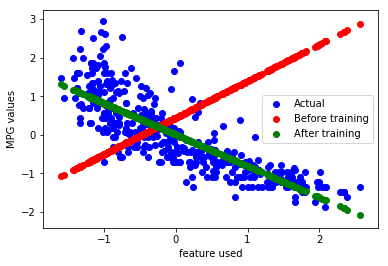

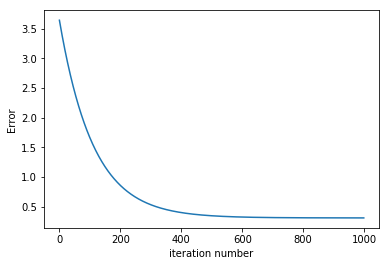

The error is :  0.3086138724141816


In [86]:
model_train(alpha=0.0045,num_of_iteration=1000,feature=dataset['weight'])